In [1]:
import os
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd

In [2]:
classified_dir = "classified_articles"
records = []

In [ ]:
friendly_countries = {
    "br", "cn", "eg", "hk", "in", "il", "pk", "pe", "ph", "ru"
}
unfriendly_countries = {
    "au", "ca", "fr", "de", "gr", "ie", "it", "jp", 
    "nl", "no", "pt", "ro", "sg", "es", "se", "ch", 
    "tw", "ua", "gb", "us"
}

In [ ]:
# 📥 Загрузка классифицированных данных
for filename in os.listdir(classified_dir):
    if not filename.endswith("_classified.json"):
        continue
    country_code = filename[:2].lower()
    with open(os.path.join(classified_dir, filename), 
              "r", 
              encoding="utf-8") as f:
        data = json.load(f)

    topics = data.get("topics", {})
    sentiment_dict = data.get("sentiment", {})

    if isinstance(sentiment_dict, dict) and sentiment_dict:
        dominant_sentiment = max(sentiment_dict.items(), 
                                 key=lambda x: x[1])[0]
    else:
        dominant_sentiment = None

    for topic, score in topics.items():
        if isinstance(score, (float, int)):
            records.append({
                "title": data.get("title", ""),
                "url": data.get("url", ""),
                "topic": topic,
                "score": float(score),
                "lang": data.get("original_language", ""),
                "sentiment": dominant_sentiment,
                "country": country_code
            })

df = pd.DataFrame(records)

C:\Users\Олег\AppData\Local\Temp\ipykernel_6612\47615847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_topics.values, y=top_topics.index, palette="viridis")


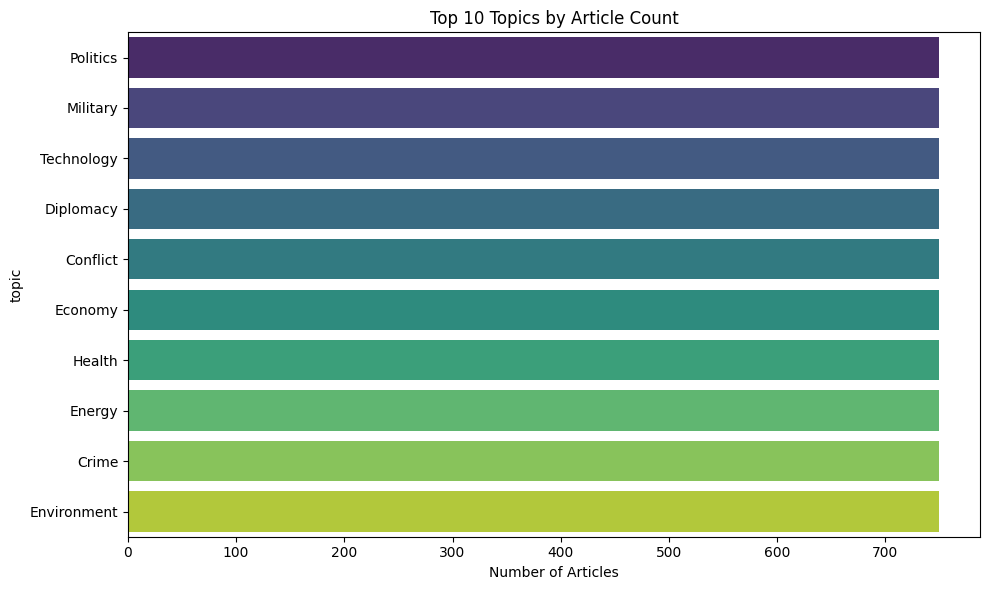

In [ ]:
# 📈 Топ тем по количеству новостей
plt.figure(figsize=(10, 6))
top_topics = df["topic"].value_counts().head(10)
sns.barplot(x=top_topics.values, 
            y=top_topics.index, 
            palette="viridis")
plt.title("Top 10 Topics by Article Count")
plt.xlabel("Number of Articles")
plt.tight_layout()
plt.show()

C:\Users\Олег\AppData\Local\Temp\ipykernel_6612\1058924520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="magma")


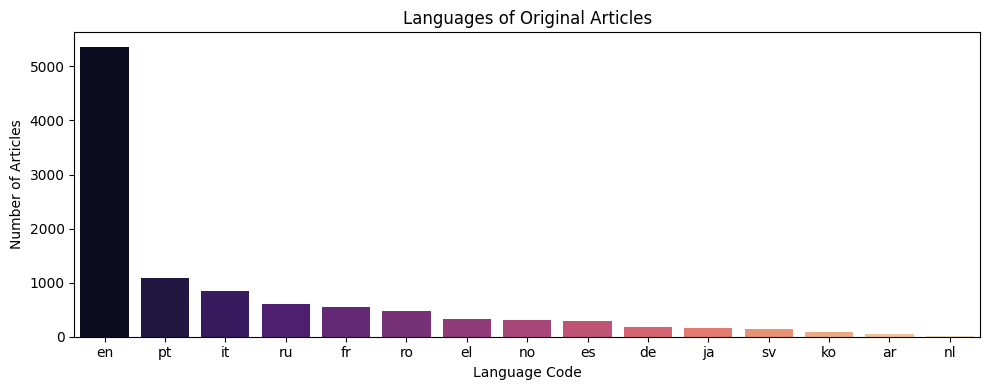

In [ ]:
# 🌍 Распределение языков
plt.figure(figsize=(10, 4))
lang_counts = df["lang"].value_counts()
sns.barplot(x=lang_counts.index, 
            y=lang_counts.values, 
            palette="magma")
plt.title("Languages of Original Articles")
plt.ylabel("Number of Articles")
plt.xlabel("Language Code")
plt.tight_layout()
plt.show()

In [7]:
# 📊 Топ статей по уверенности темы
top_scored = df.sort_values(by="score", ascending=False).head(10)
print("Top 10 Most Confident Classifications:")
print(top_scored[
    ["topic", "score", "title", "lang", "url"]
    ].to_string(index=False))

Top 10 Most Confident Classifications:
     topic    score                                                                                                      title lang                                                                                                                                                   url
  Conflict 0.998305                                                    Israel-Politiker droht Russland im russischen Staats-TV   de https://www.merkur.de/politik/israelischer-spitzenpolitiker-droht-im-russischen-staatsfernsehen-russland-wird-den-preis-dafuer-bezahlen-92592893.html
     Crime 0.998159                                G7 vai 'maximizar a pressão' se a Rússia rejeitar um cessar-fogo na Ucrânia   pt                    https://www.em.com.br/internacional/2025/05/7153875-g7-vai-maximizar-a-pressao-se-a-russia-rejeitar-um-cessar-fogo-na-ucrania.html
  Conflict 0.998070                               The Guardian view on Russia sanctions: a brittle economy is Putin

In [ ]:
sentiment_by_country = pd.crosstab(df["country"], 
                                   df["sentiment"])
sentiment_by_country = sentiment_by_country.div(
    sentiment_by_country.sum(axis=1), 
    axis=0
    )

sentiment_by_country = sentiment_by_country.sort_values(
    by="negative", 
    ascending=False
    )

<Figure size 1400x600 with 0 Axes>

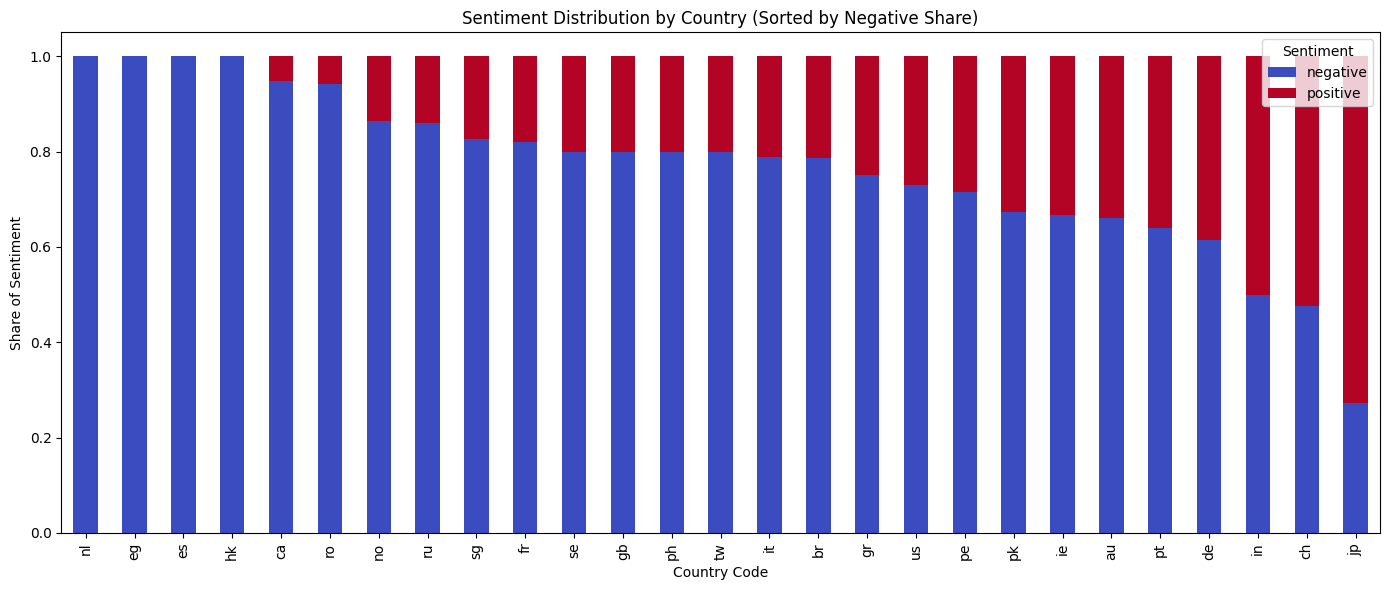

In [ ]:
# 📊 Общий график: Распределение тональностей по странам
plt.figure(figsize=(14, 6))
sentiment_by_country.plot(kind="bar", 
                          stacked=True, 
                          figsize=(14, 6), 
                          colormap="coolwarm")
plt.title("Sentiment Distribution by Country")
plt.xlabel("Country Code")
plt.ylabel("Share of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [ ]:
df_friendly = df[df["country"].isin(friendly_countries)]
sent_friendly = pd.crosstab(df_friendly["country"], 
                            df_friendly["sentiment"])
sent_friendly = sent_friendly.div(sent_friendly.sum(axis=1), axis=0)

sent_friendly = sent_friendly.sort_values(by="negative", 
                                          ascending=False)

<Figure size 1400x600 with 0 Axes>

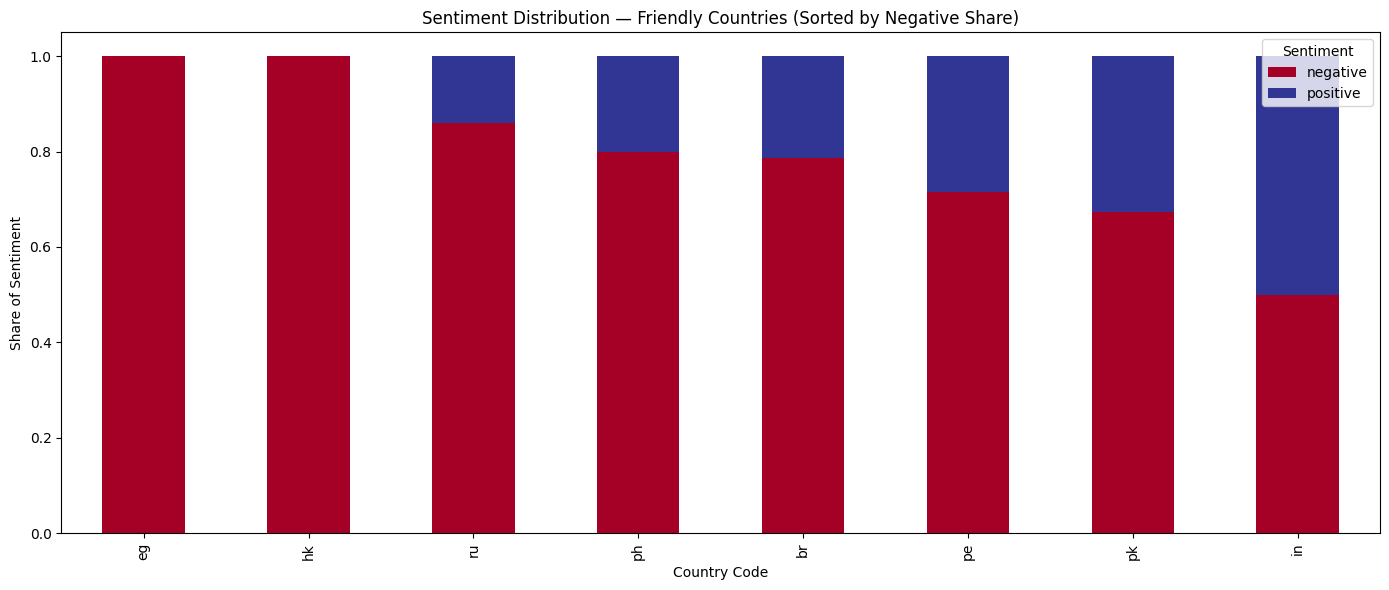

In [ ]:
plt.figure(figsize=(14, 6))
sent_friendly.plot(kind="bar", 
                   stacked=True, 
                   colormap="RdYlBu", 
                   figsize=(14, 6))
plt.title("Sentiment Distribution — Friendly Countries")
plt.xlabel("Country Code")
plt.ylabel("Share of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [ ]:
df_unfriendly = df[df["country"].isin(unfriendly_countries)]
sent_unfriendly = pd.crosstab(df_unfriendly["country"], 
                              df_unfriendly["sentiment"])
sent_unfriendly = sent_unfriendly.div(sent_unfriendly.sum(axis=1), axis=0)

sent_unfriendly = sent_unfriendly.sort_values(by="negative", 
                                              ascending=False)

<Figure size 1400x600 with 0 Axes>

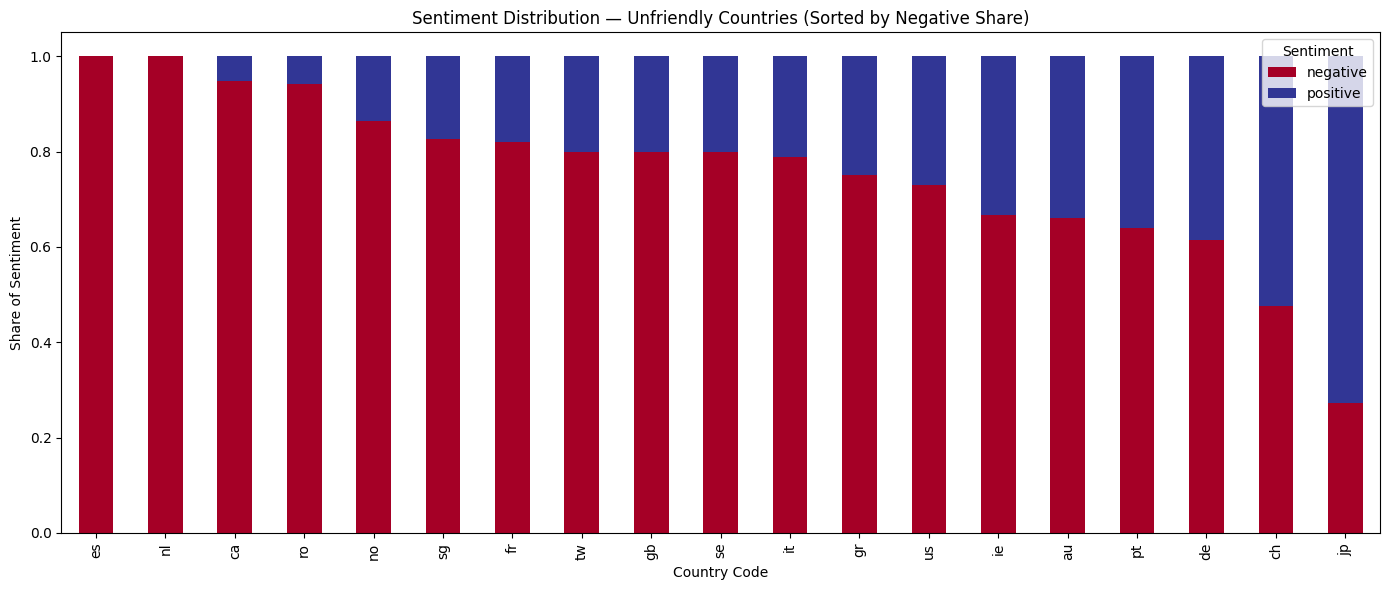

In [22]:
plt.figure(figsize=(14, 6))
sent_unfriendly.plot(kind="bar", stacked=True, colormap="RdYlBu", figsize=(14, 6))
plt.title("Sentiment Distribution — Unfriendly Countries (Sorted by Negative Share)")
plt.xlabel("Country Code")
plt.ylabel("Share of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()